<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo III: Aprendizaje supervizado: Regresión Lineal 

## Introducción

El Aprendizaje Supervizado se podría definir como un tipo de aprendizaje en IA en el que un algoritmo es entrenado con variables que incluyen los valores que queremos predecir; a estos valores conocidos se les llama `“etiquetas”` y se usan también para la evaluación del modelo. El aprendizaje supervisado se puede subdividir en dos tipos: 

- Clasificación

- Regresión.

### Clasificación

En cuanto a clasificación, el objetivo es predecir las etiquetas de clase categóricas de nuevos registros, con base en observaciones pasadas. Dependiendo de la etiqueta, se puede decir que la clasificación es binaria o multiclase. 

### Regresión

Respecto a regresión, se trata del proceso estadístico predictivo en el que el modelo intenta predecir un valor continuo (como ventas, precio, calificaciones) mediante la relación entre variables dependientes e independientes. Es decir, se encuentra una ecuación en la que se sustituyen los valores de las variables y como resultado se obtiene el valor a predecir 

### Algunos algortimos de Aprendizaje Supervizado

- **Regresión lineal:** Se trata de una regresión en la que al graficar la ecuación se forma una línea recta. Para obtener dicha ecuación, se usa el método de los cuadrados mínimos.


- **Regresión logística:** Es una regresión usada principalmente en problemas de clasificación binaria. A pesar de la aparente incongruencia, se trata de una regresión porque el resultado de la ecuación es la probabilidad de que pertenezca a una clase, que dependiendo del umbral que se utilice, se clasifica como positivo o negativo.


- **Support Vector Machine (SVM):** Típicamente se usa para problemas de clasificación, pero también se puede usar para regresión. En este algoritmo se construye un hiperplano que separa las clases de datos lo más posible.


- **Árboles de decisión:** Algoritmo de clasificación similar a un diagrama de flujo, en el que se evalúan valores en cada nodo para llegar a una clasificación al final.


- **Random Forest:** Este algoritmo consiste en combinar una gran cantidad de árboles de decisión independientes entre sí para reducir la varianza. Debido al conjunto de árboles, se le dio el nombre de “bosque”.



## Regresión Lineal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../Data/ex1data1.txt', names=['population','profit'])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


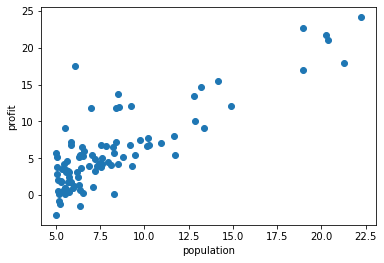

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'], data['profit'])
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [4]:
# modelo matemático de la regresión lineal
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

El objetivo es estimar el modelo:

$$ \hat{y} = \beta_1 x + \beta_0$$

donde $\beta_1$ es la pendiente y $\beta_0$ es la distancia de la intersección con el eje y.

Podemos estima mediante una ecuación matricial:

$$\hat{y}=X\beta$$

$$X=[x;1]$$
$$\beta=[\beta_1 \beta_0]$$


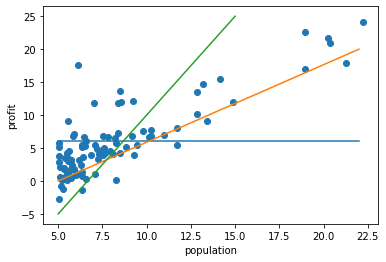

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'], data['profit'])
plt.plot([5,22],[6,6], '-')
plt.plot([5,22],[0,20], '-')
plt.plot([5,15],[-5,25], '-')

plt.xlabel('population')
plt.ylabel('profit')
plt.show()

# Implementar la función de costo 

Formalmente definimos la funcion de costo como el error cuadrático medio, qué deberemos minimizar.

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$

$\beta = [\beta_0, \beta_1]$

si derivamos parcialmente e igualamos a cero $\frac{\partial J(\beta)}{\partial \beta}=0$

### Tarea encontrar mediante las derivadas parciales las ecuciones siguientes:


tendríamos que las ecuaciones del algoritmo de gradiente descendente son:

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [6]:
#Graficar un función de costo cualquiera
x_quad = [n/10 for n in range(0,100)]
y_quad = [(n-4)**2 + 5 for n in x_quad]


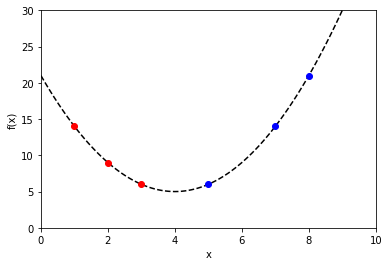

In [7]:
plt.figure(figsize=(6,4))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1,2,3],[14,9,6], 'ro')
plt.plot([5,7,8],[6,14,21], 'bo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

$$X=[1;x]$$
$$\beta=[\beta_0;\beta_1]$$
$$\hat{y}=X^T\beta = \beta_1 x +\beta_0$$


In [8]:
def cost_function(X, y, beta):
    m = len(y)
    #Calcular la función de costo
    J = np.sum((X.dot(beta) - y)**2)/(2*m)
    return J


In [9]:
#X=[1;x]
X_df['intercept']=1


In [10]:
X=np.array(X_df)
y=np.array(y_df).flatten()
beta = np.array([0,0])


In [11]:
cost_function(X, y, beta)

32.072733877455676

In [12]:
#algoritmo de gradiente descendente

def gradient_descent(X,y, beta, alpha, iterations):
    cost_history = [0]*iterations
    m = len(y)
    for iteration in range(iterations):
        y_hat = X.dot(beta)
        loss = (y_hat - y)
        gradiente = X.T.dot(loss)/m
        beta = beta - alpha*gradiente
        
        cost = cost_function(X, y, beta)
        cost_history[iteration] = cost
        
    return beta, cost_history


In [13]:
#inicializamos los parámetros
iterations = 15000
alpha = 0.01


In [14]:
(beta, cost_history) = gradient_descent(X,y,beta, alpha, iterations)

In [15]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [16]:
X

array([[ 6.1101,  1.    ],
       [ 5.5277,  1.    ],
       [ 8.5186,  1.    ],
       [ 7.0032,  1.    ],
       [ 5.8598,  1.    ],
       [ 8.3829,  1.    ],
       [ 7.4764,  1.    ],
       [ 8.5781,  1.    ],
       [ 6.4862,  1.    ],
       [ 5.0546,  1.    ],
       [ 5.7107,  1.    ],
       [14.164 ,  1.    ],
       [ 5.734 ,  1.    ],
       [ 8.4084,  1.    ],
       [ 5.6407,  1.    ],
       [ 5.3794,  1.    ],
       [ 6.3654,  1.    ],
       [ 5.1301,  1.    ],
       [ 6.4296,  1.    ],
       [ 7.0708,  1.    ],
       [ 6.1891,  1.    ],
       [20.27  ,  1.    ],
       [ 5.4901,  1.    ],
       [ 6.3261,  1.    ],
       [ 5.5649,  1.    ],
       [18.945 ,  1.    ],
       [12.828 ,  1.    ],
       [10.957 ,  1.    ],
       [13.176 ,  1.    ],
       [22.203 ,  1.    ],
       [ 5.2524,  1.    ],
       [ 6.5894,  1.    ],
       [ 9.2482,  1.    ],
       [ 5.8918,  1.    ],
       [ 8.2111,  1.    ],
       [ 7.9334,  1.    ],
       [ 8.0959,  1.    ],
 

In [17]:
beta

array([ 1.19303364, -3.89578088])

El objetivo es estimar el modelo:

$$ \hat{y} = 1.193 x + -3.8957$$

In [18]:
# Graficar la recta resultamte que más se ajusta a lso datos
best_fit_x = np.linspace(0,25,20)
y_hat_fit = [beta[1] + beta[0]*c for c in best_fit_x] 


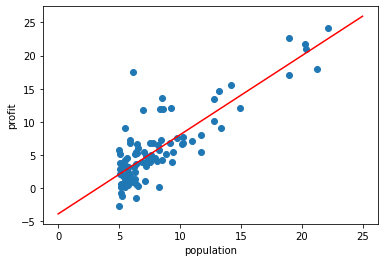

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'], data['profit'])
plt.plot(best_fit_x, y_hat_fit, '-r')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [20]:
cost_history

[6.737190464870009,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.8900949431173295,
 5.885004158443647,
 5.879932480491418,
 5.874879094762575,
 5.869843911806385,
 5.8648268653129305,
 5.859827889932181,
 5.85484692057229,
 5.849883892376587,
 5.844938740722034,
 5.840011401218361,
 5.8351018097072265,
 5.830209902261388,
 5.825335615183863,
 5.820478885007099,
 5.815639648492154,
 5.810817842627869,
 5.806013404630044,
 5.801226271940628,
 5.7964563822269,
 5.7917036733806535,
 5.7869680835173956,
 5.782249550975539,
 5.777548014315596,
 5.772863412319382,
 5.768195683989214,
 5.76354476854712,
 5.758910605434047,
 5.754293134309077,
 5.749692295048629,
 5.745108027745684,
 5.740540272709012,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333528,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123857,
 5.695757917651815,
 5.691367918863752,
 5.68699373259798,
 5.682635301898707,
 5.678292570015292,


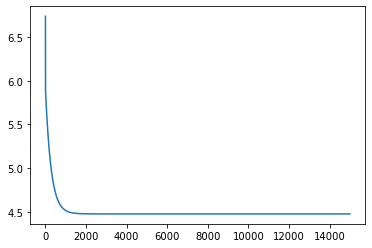

In [21]:
plt.plot(cost_history)

In [22]:
# Predecir un nuevo valor
x_new = 17
# [x,1]*beta
y_predict = np.array([x_new,1]).dot(beta)
y_predict

16.385791072906276

## Ejemplo usando la librería de Sklearn

### Ejemplo 1:

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
data = pd.read_csv('../Data/ex1data1.txt', names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [25]:
# Identificar las variables independientes, dependientes
x = data['population'].values.reshape(-1,1)
y = data['profit'].values.reshape(-1,1)

In [26]:
# y_hat = b1*x + b0
# Aplicar un modelo lineal con la librería
modelo = LinearRegression()
#Entrenar al modelo lineal
modelo.fit(x,y)
#Predecir datos en x
y_pred = modelo.predict(x)

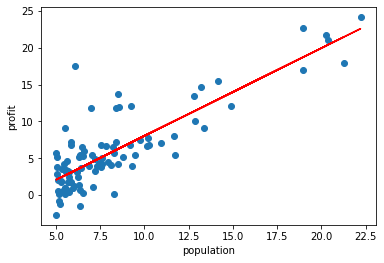

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'], data['profit'])
plt.plot(x, y_pred, '-r')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [28]:
# coeficientes que acompañan a la variable independiente "x" beta_1,..,beta_n
modelo.coef_

array([[1.19303364]])

In [29]:
# coeficientes de intercepción al eje de las abcisas beta_0
modelo.intercept_

array([-3.89578088])

##### Modelo Obtenido

$$\hat{y} = 1.193  x - 3.895$$

### Ejemplo 2:

In [30]:
datos = pd.read_csv('../Data/Position_Salaries.csv')

In [31]:
datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [32]:
datos['Level'].values.reshape(1,-1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]], dtype=int64)

In [33]:
# identificar las variables independientes,dependientes
x=datos['Level'].values.reshape(-1,1)
y=datos['Salary'].values.reshape(-1,1)

Text(0, 0.5, 'Salary')

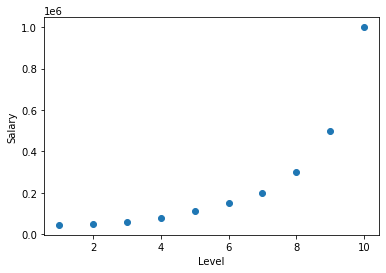

In [34]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xlabel('Level')
plt.ylabel('Salary')

Error cuadrático Medio: 26695878787.878788
R2_score: 0.5053238120653418


(array([[80878.78787879]]), array([-195333.33333333]))

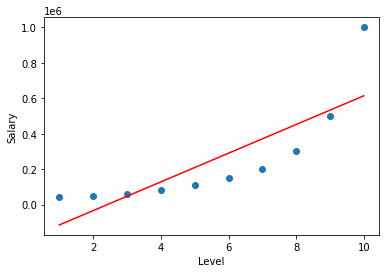

In [35]:
# Buscar un modelo lineal que se ajuste a los datos

# 1.- Entrenar un modelo lineal con la librería y_hat=b1*x + bo
modelo = LinearRegression()
modelo.fit(x,y)
# 2.- Predecir los valores de x
y_pred = modelo.predict(x)
# 3.- Grafiquen su modelo con los datos originales
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.xlabel('Level')
plt.ylabel('Salary')
# 4.- mean_squared_error(y_pred,y), r2_score(y_pred,y) 
print('Error cuadrático Medio: '+str(mean_squared_error(y_pred,y)))
print('R2_score: '+str(r2_score(y_pred,y)))
modelo.coef_, modelo.intercept_

### Ejemplo aplicando un modelo de regresión polinomial

In [71]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [47]:
# y_hat = beta_2*x^2 + beta_1*x + beta_0

from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly = PolynomialFeatures(degree=3, include_bias = False)


In [59]:
x_poly = poly.fit_transform(x)

In [60]:
#[x;x^2]
# y_hat = X*Beta
# X=[1;x]
# Beta = [beta_0;beta_1]
# y_hat = btea_0 + beta_1*x
x_poly

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

In [61]:
# Obtener el modelo
modelo = LinearRegression()
modelo.fit(x_poly, y)

LinearRegression()

In [62]:
#y_pred = beta_2*x^2 + beta_1*x + beta_0
y_pred = modelo.predict(x_poly)

Error cuadrático Medio: 1515662004.6620116
R2_score: 0.9808499387901439


(array([[180664.33566434, -48548.95104895,   4120.04662005]]),
 array([-121333.33333334]))

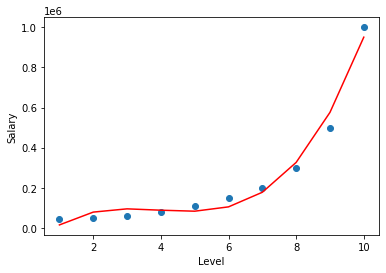

In [63]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.xlabel('Level')
plt.ylabel('Salary')
# 4.- mean_squared_error(y_pred,y), r2_score(y_pred,y) 
print('Error cuadrático Medio: '+str(mean_squared_error(y_pred,y)))
print('R2_score: '+str(r2_score(y_pred,y)))
modelo.coef_, modelo.intercept_

## Actividad : Predecir los sig niveles
- Crear un modelo polinomial de grado 3 y predecir los niveles sig:
- x_new = [2.5,8.5,13]
- Graficar los nuevos niveles y sus respectivos salarios


In [72]:
# Predicir nuevos valores (utilizando el modelo entrenado)
x_new_array = np.array([[2.5],[7.5]])
x_new_array

array([[2.5],
       [7.5]])

In [73]:
x_new_poly = poly.fit_transform(x_new_array)
x_new_poly

array([[  2.5  ,   6.25 ,  15.625],
       [  7.5  ,  56.25 , 421.875]])

In [74]:
y_new_predict = modelo.predict(x_new_poly)
y_new_predict

array([[ 91272.29020979],
       [240915.35547786]])

In [64]:
# Predicir nuevos valores (utilizando los coeficientes del modelo entrenado)
modelo.coef_

array([[180664.33566434, -48548.95104895,   4120.04662005]])

In [68]:
b3 = modelo.coef_[0,2]
b2 = modelo.coef_[0,1]
b1 = modelo.coef_[0,0]
b0 = modelo.intercept_


In [69]:
x_new=2.5
y_new_pred = b3*x_new**3 + b2*x_new**2 + b1*x_new + b0
y_new_pred

array([91272.29020979])

In [70]:
datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Multiple Linear Regresion

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
dataset = pd.read_csv('../Data/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [78]:
# Definir las variables dependientes e independientes
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [79]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#   ... ,NY, CA, FL
#[0.0, 116983.8, 45173.06,0,1,0]

In [82]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [84]:
# Construir el modelo de Regresión Multiple

from sklearn.linear_model import LinearRegression


In [86]:
modelo_multiple = LinearRegression()
# Entrenamiento del modelo
modelo_multiple.fit(X, y)

LinearRegression()

In [87]:
# Predicción
y_pred = modelo_multiple.predict(X)

In [88]:
y_pred

array([192390.57136321, 189071.32010493, 182276.18673285, 173584.97618976,
       172277.13381668, 163473.80711842, 158099.29278418, 160155.64464938,
       151634.74332631, 154829.66252709, 135664.64259064, 135528.60078161,
       129282.91780691, 127431.24898632, 149694.38277549, 146143.63551379,
       116854.0745287 , 130085.40993358, 129149.72574274, 115594.18840731,
       116570.73444001, 117201.50508973, 114833.30513843, 110123.79610587,
       113294.37345155, 102200.26891867, 110765.30116879, 114279.8040301 ,
       101818.5873869 , 101721.0420294 ,  99629.0105373 ,  97617.2963202 ,
        98988.23660304,  98061.35894838,  88974.70416293,  90420.0096061 ,
        75423.09286559,  89577.70222197,  69606.52160904,  83684.97603991,
        74762.74617647,  74956.31104908,  70575.99371382,  60100.2682187 ,
        64585.14721291,  47588.36470993,  56272.99268495,  46468.23200484,
        49123.07308287,  48185.03879259])

In [95]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [89]:
# Calcular los errores y el r2 score


Text(0.5, 0.92, '50_startups')

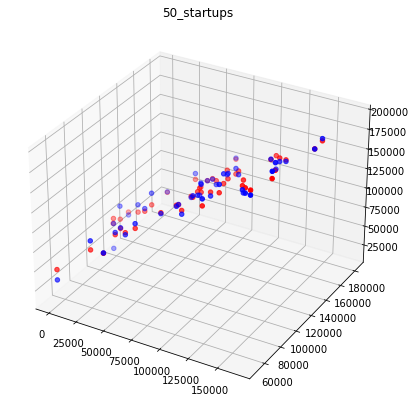

In [94]:
# Elegir 3 variables
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection = '3d')

ax.scatter3D(dataset['R&D Spend'],dataset['Administration'],dataset['Profit'], c='b')
ax.scatter3D(dataset['R&D Spend'],dataset['Administration'],y_pred, c='r')
plt.title('50_startups')

In [96]:
modelo_multiple.intercept_

50177.64442290499

In [97]:
modelo_multiple.coef_

array([-5.23005912e+01,  1.46488202e+02, -9.41876104e+01,  8.06023114e-01,
       -2.70043196e-02,  2.69798610e-02])

In [98]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

$$\hat{y} = \beta_0 + \beta_1*x_1 + \beta_2*x_2+ ... + \beta_6*x_6$$